In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,1.055116,-0.866682,-1.527572
2016-07-01 00:00:01,0.419440,0.549274,0.348700
2016-07-01 00:00:02,-0.808139,0.176537,2.781544
2016-07-01 00:00:03,0.191144,1.276436,-0.256152
2016-07-01 00:00:04,-0.245847,-0.210575,-0.080081


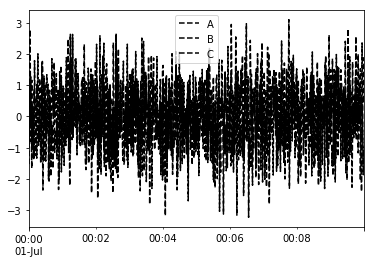

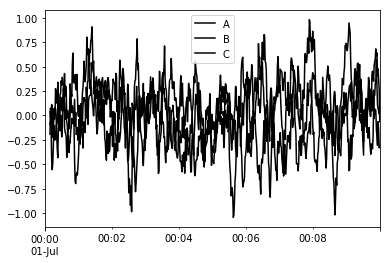

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\MSI_USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.716089,-0.111505,-0.526894
2016-07-01 00:00:02,0.138867,-0.002424,0.726006
2016-07-01 00:00:03,0.154658,0.383875,0.429330
2016-07-01 00:00:04,0.051878,0.231324,0.298602
2016-07-01 00:00:05,0.304142,-0.197928,0.003727
2016-07-01 00:00:06,0.118230,-0.081891,-0.025751
2016-07-01 00:00:07,0.047415,0.001774,-0.023968
2016-07-01 00:00:08,-0.206763,-0.098097,0.004148
2016-07-01 00:00:09,-0.026291,-0.308453,-0.191318


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.756586,0.996781,-0.780560,-0.224990
2016-06-07,-1.562940,-1.323901,0.572795,1.657722
2016-06-08,-0.022625,-0.763655,1.611199,-0.255567
2016-06-09,0.125193,1.495594,0.661121,-0.759607
2016-06-10,0.027106,-0.188016,0.932852,1.763071


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D74F09DBA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002D74EC7E2E8>], dtype=object)

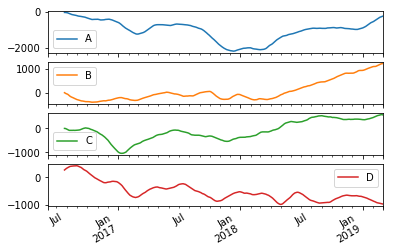

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.113518,0.724427,2.145286,0.995169


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.024884,0.334830,-0.494163,0.603871
2016-06-08,-0.292916,-0.140372,0.138369,0.794969
2016-06-09,-0.395633,-0.004074,0.619916,0.700617
2016-06-10,-0.451843,0.040101,1.095414,0.996619


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
# An expanding window will provide a more stable statistic because further along in time the data will be averaged over 
# the whole lifetiem of data whereas the rolling statistic is only averaged in a (possibly short) window 
# The rolling statistic can be more useful when recent data holds more weight that older data and one does not want to 
# put equal weight on all the data points for the average as in the expanding case.

In [ ]:
# EWMA
# Why use EWMA?
# Exponential smoothing is commonly applied to smoothen data, as many window functions are in signal processing,
# acting as low-pass filters to remove high frequency noise. 

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

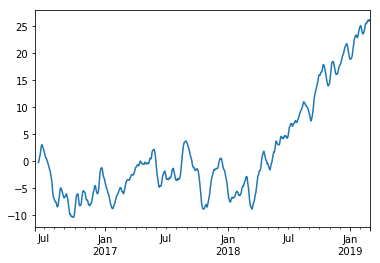

In [36]:
df.rolling(window = 10)['B'].mean().plot()

C:\Users\MSI_USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=10,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


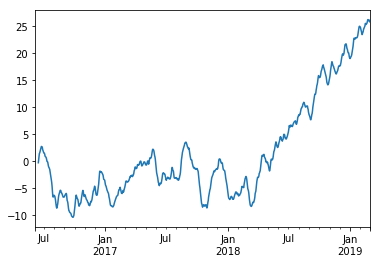

In [37]:
pd.ewma(df['B'], span = 10, min_periods = 10).plot()